In [65]:
import os, warnings, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

    단어빈도 파일을 통해 워드 클라우드를 만드려면
    딕셔너리 형태가 되어야 함.

In [55]:
url = 'UseData/Voucher/WordExtract/'
# os.listdir(url)
filename = os.listdir(url)[1]
filename

'네이버쇼핑_(단호박_다이어트식품)_cleaned_keyword_pos.csv'

In [56]:
df = pd.read_csv(url + filename, index_col=0)
df

,word,freq
0,좋다,549
1,맛있다,532
2,있다,192
3,단호박,173
4,배송,160
...,...,...
383,두통,2
384,색다르다,2
385,용도,2
386,재밌다,2


In [57]:
wordDict = {}
for a, x in df.values:
    wordDict[a] = x
wordDict

{'좋다': 549,
 '맛있다': 532,
 '있다': 192,
 '단호박': 173,
 '배송': 160,
 '대용': 130,
 '같다': 121,
 '구매': 110,
 '빠르다': 106,
 '먹기': 101,
 '주문': 85,
 '아침': 85,
 '간식': 83,
 '식사': 78,
 '단백질': 68,
 '저렴하다': 64,
 '다이어트': 59,
 '제품': 58,
 '좋아하다': 56,
 '이다': 55,
 '괜찮다': 51,
 '든든하다': 48,
 '만족하다': 42,
 '구입': 41,
 '생각': 40,
 '프로': 40,
 '하나': 39,
 '우유': 39,
 '진짜': 39,
 '가격': 37,
 '보고': 37,
 '유통': 36,
 '편하다': 35,
 '없다': 35,
 '제일': 34,
 '기한': 34,
 '포만': 34,
 '쉐이크': 32,
 '노프': 31,
 '출출하다': 29,
 '아주': 29,
 '최고': 28,
 '포장': 28,
 '조금': 28,
 '카카오': 28,
 '고소하다': 27,
 '느낌': 26,
 '정말': 25,
 '운동': 25,
 '상품': 24,
 '달달': 24,
 '간편하다': 24,
 '적당하다': 23,
 '항상': 22,
 '초코': 22,
 '저녁': 22,
 '별로': 22,
 '추천': 21,
 '건강하다': 21,
 '다음': 21,
 '다른': 21,
 '틴바': 21,
 '칼로리': 20,
 '입맛': 20,
 '넉넉하다': 18,
 '박스': 17,
 '많다': 17,
 '성분': 17,
 '최애': 17,
 '계속': 17,
 '배고프다': 16,
 '아침식사': 16,
 '높다': 16,
 '아니다': 16,
 '그냥': 16,
 '빨르다': 16,
 '딱딱하다': 16,
 '그렇다': 15,
 '남편': 14,
 '함량': 14,
 '사서': 13,
 '가지': 13,
 '무화과': 13,
 '아이': 13,
 '간단하다': 13,
 '호박': 13,
 

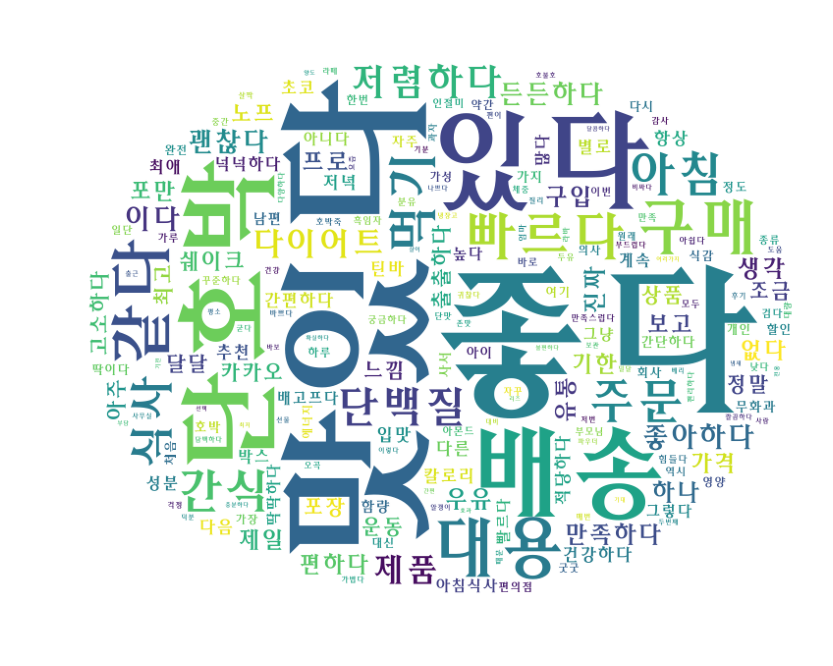

In [70]:
from PIL import Image
from wordcloud import WordCloud
import numpy as np

kabocha_mask = np.array(Image.open('UseData/Voucher/kabocha_mask.png'))

wordcloud = WordCloud(width=1600, height=800, font_path = font_location, background_color='white', mask=kabocha_mask)
wordcloud.generate_from_frequencies(frequencies=wordDict)

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis('off')
plt.show()

    기존 프레임에서 불필요한 단어들을 없애야할 것 같은데
    맛 / 있다, 때, 것, 많다 이런거.

In [74]:
os.listdir(url)[0]

'네이버쇼핑_(단호박_다이어트식품)_cleaned_keyword_neg.csv'

In [75]:
df_neg = pd.read_csv(url + os.listdir(url)[0], index_col=0)
df_neg

,word,freq
0,단호박,13
1,별로,6
2,조금,5
3,아니다,5
4,포장,4
...,...,...
91,회사,1
92,최악,1
93,순간,1
94,안좋다,1


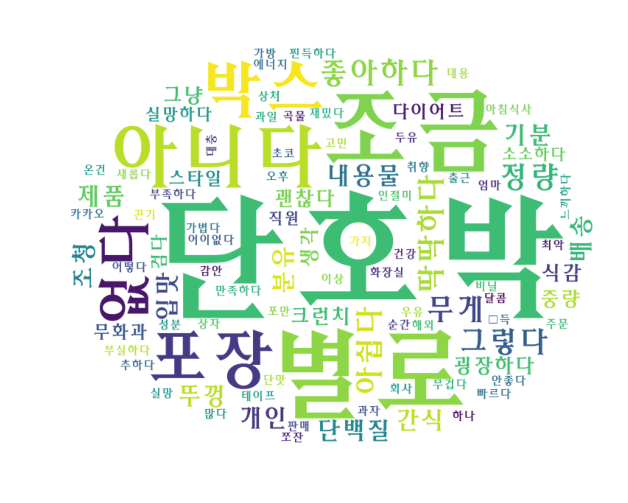

In [76]:
wordDict2 = {}
for a, x in df_neg.values:
    wordDict2[a] = x

from wordcloud import WordCloud

wordcloud2 = WordCloud(width=1600, height=800, font_path = font_location, background_color='white', mask=kabocha_mask)
wordcloud2.generate_from_frequencies(frequencies=wordDict2)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud2, interpolation='kaiser')
plt.axis('off')
plt.show()

    1. 불용어 사전 직접 정의해서(하나하나 타이핑?) 빼기
    2. csv 파일 look-up해서 직접 지우기 (일단은 크기가 그렇게 크지 않으니까?)
    3. 인터넷에 있는 불용어 사전 받아와서 빼기
    ----------------------
    아니면,
    단어 길이가 1인 것들 전부 제거한 다음 1/2/3 중 선택해서 지우기? 이게 맞을것 같기도 하고

In [31]:
df = pd.read_csv(url + filename, index_col=0)
df

,word,freq
0,좋다,549
1,맛있다,532
2,맛,429
3,있다,192
4,단호박,173
...,...,...
495,색다르다,2
496,용도,2
497,속,2
498,재밌다,2


In [33]:
df['TF'] = df['word'].apply(lambda x: len(x) > 1)
df

,word,freq,TF
0,좋다,549,True
1,맛있다,532,True
2,맛,429,False
3,있다,192,True
4,단호박,173,True
...,...,...,...
495,색다르다,2,True
496,용도,2,True
497,속,2,False
498,재밌다,2,True


In [34]:
# TF가 False인 것들만 제거?
df.drop(df[df['TF'] == False].index, inplace=True)
df

,word,freq,TF
0,좋다,549,True
1,맛있다,532,True
3,있다,192,True
4,단호박,173,True
5,배송,160,True
...,...,...,...
494,두통,2,True
495,색다르다,2,True
496,용도,2,True
498,재밌다,2,True


In [47]:
df = df.reset_index(drop=True)
df

,word,freq,TF
0,좋다,549,True
1,맛있다,532,True
2,있다,192,True
3,단호박,173,True
4,배송,160,True
...,...,...,...
383,두통,2,True
384,색다르다,2,True
385,용도,2,True
386,재밌다,2,True


In [53]:
sample = []
for word in df['word']:
    if len(word) >= 3 and len(word) < 5:
        sample.append(word)
sample

['맛있다',
 '단호박',
 '빠르다',
 '단백질',
 '저렴하다',
 '다이어트',
 '좋아하다',
 '괜찮다',
 '든든하다',
 '만족하다',
 '편하다',
 '쉐이크',
 '출출하다',
 '카카오',
 '고소하다',
 '간편하다',
 '적당하다',
 '건강하다',
 '칼로리',
 '넉넉하다',
 '배고프다',
 '아침식사',
 '아니다',
 '빨르다',
 '딱딱하다',
 '그렇다',
 '무화과',
 '간단하다',
 '딱이다',
 '에너지',
 '편의점',
 '아몬드',
 '인절미',
 '궁금하다',
 '힘들다',
 '부모님',
 '꾸준하다',
 '흑임자',
 '호박죽',
 '아쉽다',
 '편리하다',
 '가볍다',
 '다양하다',
 '바쁘다',
 '부드럽다',
 '귀찮다',
 '비싸다',
 '깔끔하다',
 '담백하다',
 '이렇다',
 '나쁘다',
 '알갱이',
 '파우더',
 '호불호',
 '사무실',
 '두번째',
 '냉장고',
 '여러가지',
 '확실하다',
 '충분하다',
 '달콤하다',
 '불편하다',
 '함유량',
 '영양가',
 '아침밥',
 '이벤트',
 '배부르다',
 '그린티',
 '어떻다',
 '인터넷',
 '쟁여놓',
 '건더기',
 '서비스',
 '텀블러',
 '아이디어',
 '쉐이커',
 '맛없다',
 '맘에듭니',
 '리뉴얼',
 '훌륭하다',
 '크리스',
 '자마자',
 '솔직하다',
 '필요하다',
 '호박엿',
 '새롭다',
 '배송비',
 '숟가락',
 '고구마',
 '볶음밥',
 '간편식',
 '추하다',
 '꼼꼼하다',
 '저녁식사',
 '게다가',
 '가능하다',
 '그대로',
 '다르다',
 '마시기',
 '제대로',
 '뻥튀기',
 '중국산',
 '영양소',
 '튼튼하다',
 '살빼다',
 '힘드다',
 '브랜드',
 '진하다',
 '라이브',
 '풍부하다',
 '쟁여두',
 '말랑하다',
 '지난번',
 '스타트',
 '안되다',
 '프라이어',
 '파운드',
 '유산균',
 '견과류',
 '사이트',


In [85]:
stopurl = 'UseData/Voucher/stoplist_pos.txt'

with open(stopurl, 'r', encoding='utf8') as f:
    stopwords = []
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        stopwords.append(line)
stopwords[:3]

['있다', '같다', '이다']

In [83]:
df_pos = pd.read_csv(url + filename, index_col=0)
df_pos

,word,freq
0,좋다,549
1,맛있다,532
2,있다,192
3,단호박,173
4,배송,160
...,...,...
383,두통,2
384,색다르다,2
385,용도,2
386,재밌다,2


In [86]:
# word 컬럼을 루프 돌면서
for words in df_pos['word']:
    # 만일 해당 단어가 stopwords에 있는 단어라면
    if words in stopwords:
        # 해당 위치의 index를 받고, 해당 행을 삭제.;
        df.drop(df[df['word'] == words].index, inplace=True)
        df = df.reset_index(drop=True)
df

,word,freq
0,좋다,549
1,맛있다,532
2,단호박,173
3,배송,160
4,대용,130
...,...,...
278,두통,2
279,색다르다,2
280,용도,2
281,재밌다,2


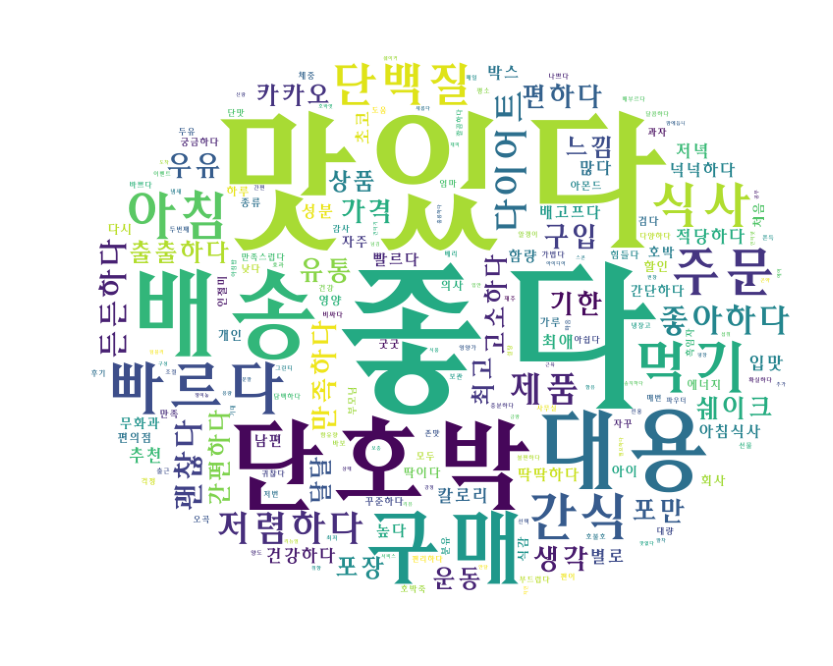

In [89]:
wordDict = {}
for a, x in df.values:
    wordDict[a] = x
wordDict

from PIL import Image
from wordcloud import WordCloud
import numpy as np

kabocha_mask = np.array(Image.open('UseData/Voucher/kabocha_mask.png'))

wordcloud = WordCloud(width=1600, height=800, font_path = font_location, background_color='white', mask=kabocha_mask)
wordcloud.generate_from_frequencies(frequencies=wordDict)

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis('off')
plt.show()